# Plotting the PPG signal from Pulse Oximeter

##### This notebook will plot the PPG signal from the log file created from Pulse Oximeter Data set.

##### Being the visual component particularly important for a researcher, in order to extract knowledge from the acquired data. 
##### Plotting data brings another perspective to the researcher, stimulating the human sensorial component, which is ideal for identifying patterns and communicate.

In [529]:
#Import library modules
import pandas as pd
#import bqplot
#from bqplot import pyplot as plt
import numpy as np
# biosignalsnotebooks own package for loading and plotting the acquired data
import biosignalsnotebooks as bsnb
import neurokit2 as nk
import matplotlib.pyplot as plt

### 1. Print CSV file header

In [530]:
#Input the CSV file to the parser
df = pd.read_csv('PPG_2020-10-24_19-28-38.csv')

#print the keys in the csv file
df.keys()

#print(df['Time'].values[interesting_indices] )

Index(['Time', ' Sample Count', ' IR Count', ' Red Count',
       ' X Axis Acceleration', ' Y Axis Acceleration', ' Z Axis Acceleration',
       ' Heart Rate', ' HR Confidence', ' RR', ' SPO2', ' R Value',
       ' Algorithm Status'],
      dtype='object')

### 2. Plot the region between the sample 2,20,000 and 2,20,900

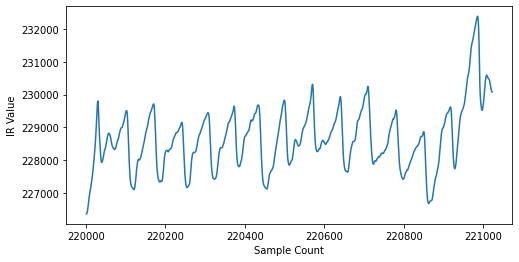

In [531]:
#Visualise the PPG data in the Graph format
plt.figure(figsize=(8,4))
interesting_indices = np.argwhere(np.logical_and(df[' Sample Count'].values > 220000, df[' Sample Count'].values < 221024))

signal = df[' IR Count'].values[interesting_indices]

plt.plot(df[' Sample Count'].values[interesting_indices], signal, label="raw" )

plt.xlabel("Sample Count")
plt.ylabel("IR Value")
plt.show()


### 3. Normalization of signal using mean value filtering

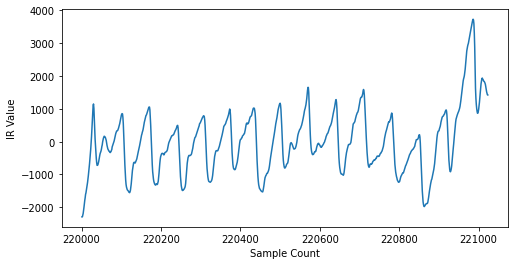

In [532]:
# Removal of continuous component from our signal (baseline shift through the subtraction of the average value)
plt.figure(figsize=(8,4))

filtered_signal = np.array(signal) - np.mean(signal)

plt.plot(df[' Sample Count'].values[interesting_indices], filtered_signal , label="filtered")

plt.xlabel("Sample Count")
plt.ylabel("IR Value")
plt.show()

### 4. Clean PPG Signal

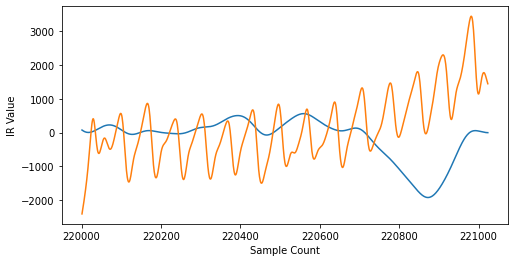

In [533]:
plt.figure(figsize=(8,4))
ppg_elgendi = nk.ppg_clean(filtered_signal, method='elgendi')
ppg_nabian = nk.ppg_clean(filtered_signal, method='nabian2018', heart_rate=100)
#signals = pd.DataFrame({"PPG_Raw" : filtered_signal, "PPG_Elgendi" : ppg_elgendi})

#signals.plot() 

plt.plot(df[' Sample Count'].values[interesting_indices], ppg_elgendi , label="clean")

clean_ppg = ppg_nabian - ppg_elgendi

plt.plot(df[' Sample Count'].values[interesting_indices], clean_ppg , label="clean")

plt.xlabel("Sample Count")
plt.ylabel("IR Value")
plt.show()

### 5. Frequency domain representation of above signal

maximum of |Y| is: 339.4 
maximum of Frequency is: 1.466 
Heart BPM is: 87.98 


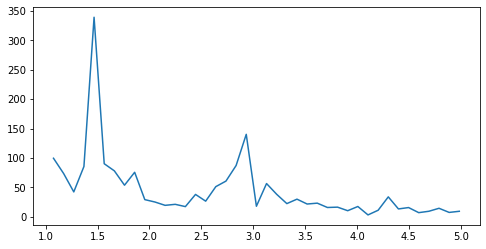

In [534]:
plt.figure(figsize=(8,4))
samplingFrequency = 100
# Normalize amplitude
fourierTransform = np.fft.fft(clean_ppg)/len(clean_ppg)           
# Exclude sampling frequency
fourierTransform = fourierTransform[range(int(len(clean_ppg)/2))] 

tpCount     = len(clean_ppg)
values      = np.arange(int(tpCount/2))
timePeriod  = tpCount/samplingFrequency

frequencies = values/timePeriod
interesting_frq = np.argwhere(np.logical_and(frequencies > 1, frequencies < 5))
       
plt.plot(frequencies[interesting_frq], abs(fourierTransform[interesting_frq]))

print("maximum of |Y| is: %.4g " % np.max(np.abs(fourierTransform[interesting_frq])))
freq_max = np.argmax(abs(fourierTransform[interesting_frq]))

#print("maximum of |Y| is: %.4g " % freq_max)
print("maximum of Frequency is: %.4g " % frequencies[interesting_frq[freq_max]])

print("Heart BPM is: %.4g " % (frequencies[interesting_frq[freq_max]]*60))

### 6. Find Peaks in PPG Signal

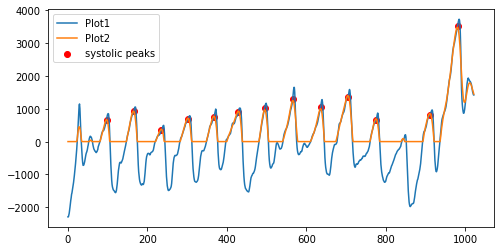

In [535]:
plt.figure(figsize=(8,4))

info = nk.ppg_findpeaks(ppg_nabian, sampling_rate=100)
peaks = info["PPG_Peaks"]

plt.plot(filtered_signal , label="Plot1")
plt.plot(ppg_nabian , label="Plot2")
plt.scatter(peaks, filtered_signal[peaks], c="r", label="systolic peaks") 
plt.legend() 

### 7. Process PPG Signal

In [536]:
signals, info = nk.ppg_process(filtered_signal, sampling_rate=100)


### 8. Plot processed PPG Signal

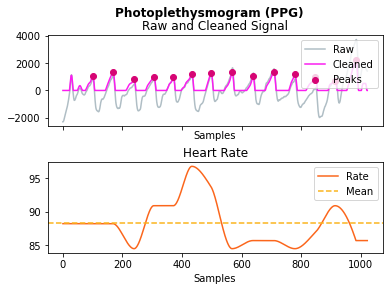

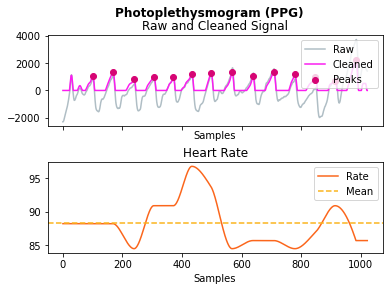

In [537]:
nk.ppg_plot(signals) 

#### In a scientific research, graphical representations of collected data or time-series describing the evolution of extracted parameters is essential to achieve a better knowledge of the phenomenon under analysis, considering that a graphical plot is much more intuitive than raw numerical data.